In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

In [27]:
df = pd.read_csv('F:\\CS 325 Data Mining\\Datasets\\archive\\Heart.csv')
print(df.head())
print(df.columns)

   Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
0   63    1       typical     145   233    1        2    150      0      2.3   
1   67    1  asymptomatic     160   286    0        2    108      1      1.5   
2   67    1  asymptomatic     120   229    0        2    129      1      2.6   
3   37    1    nonanginal     130   250    0        0    187      0      3.5   
4   41    0    nontypical     130   204    0        2    172      0      1.4   

   Slope   Ca        Thal  AHD  
0      3  0.0       fixed   No  
1      2  3.0      normal  Yes  
2      2  2.0  reversable  Yes  
3      3  0.0      normal   No  
4      1  0.0      normal   No  
Index(['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR',
       'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')


In [28]:
X= df.iloc[:,1:14]
Y= df.iloc[:,-1]
df['ChestPain'].replace(['typical', 'nontypical', 'nonanginal', 'asymptomatic'], [1,2,3,4], inplace=True)
df['Thal'].replace(['normal', 'fixed', 'reversable'], [1,2,3], inplace=True)
df['AHD'].replace(['No', 'Yes'], [0,1], inplace=True)
df.replace('NA', np.nan, inplace = True)
df.replace(' ', np.nan, inplace = True)
df.dropna( inplace = True, how = 'any')
df = df[df.Thal != '.']
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,2.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,1.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,3.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,1.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1.0,0


<AxesSubplot:xlabel='MaxHR', ylabel='AHD'>

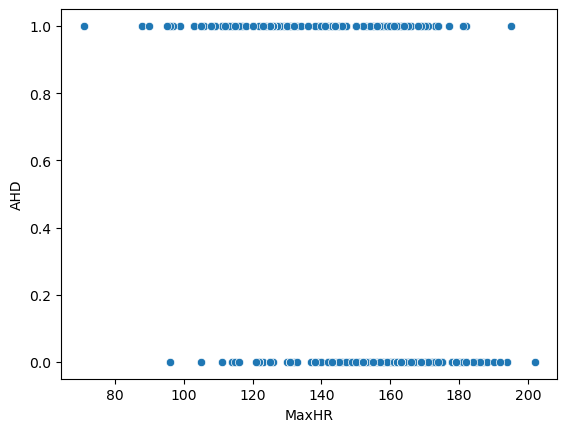

In [29]:
sns.scatterplot(x='MaxHR',
y='AHD', data=df)

In [30]:
X = df.drop('MaxHR',axis= 1)
y = df['AHD']
print(X)
print(y)


     Age  Sex  ChestPain  RestBP  Chol  Fbs  RestECG  ExAng  Oldpeak  Slope  \
0     63    1          1     145   233    1        2      0      2.3      3   
1     67    1          4     160   286    0        2      1      1.5      2   
2     67    1          4     120   229    0        2      1      2.6      2   
3     37    1          3     130   250    0        0      0      3.5      3   
4     41    0          2     130   204    0        2      0      1.4      1   
..   ...  ...        ...     ...   ...  ...      ...    ...      ...    ...   
297   57    0          4     140   241    0        0      1      0.2      2   
298   45    1          1     110   264    0        0      0      1.2      2   
299   68    1          4     144   193    1        0      0      3.4      2   
300   57    1          4     130   131    0        0      1      1.2      2   
301   57    0          2     130   236    0        2      0      0.0      2   

      Ca  Thal  AHD  
0    0.0   2.0    0  
1    3.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101)

In [32]:
model = LinearRegression()

In [34]:
model.fit(X_train,y_train)

LinearRegression()

In [35]:
predictions = model.predict(X_test)

In [36]:
print(
  'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  1.5072635744113562e-30
mean_absolute_error :  9.81015163773658e-16
